# Case 3 - Wednesday, May 8th

In [1]:
using Distributions, Random, DataFrames, Plots, LinearAlgebra, XLSX

In [2]:
function regress(y, X) 

    n = size(X, 1) # Sample size
    K = size(X, 2) # Number of regressors

    beta = inv(X'X)X'y # Estimated coefficients
    yHat = X * beta # Estimates for dependent
    e = y - (X*beta) # Residuals

    SSR = e'e 
    s2 = SSR / (n - K)
    s = sqrt(s2)

    i = ones(n)
    yMean = inv(i'i)i'y
    T = (y .- yMean)
    TSS = T'T

    RSq = 1 - (SSR / TSS)
    Adj = 1 - (SSR / (n - K)) / (TSS / (n - 1))

    betaSE = sqrt.(diag(inv(X'X)*s2))

    return(beta = beta, n, K, yHat, e, SSR, s2, s, yMean, TSS, RSq, Adj, betaSE)
end



regress (generic function with 1 method)

### Team 3 presents (Team 4 lead/back up/feedback)

In [3]:
# Exercise 2.10
Random.seed!(1967)

function Ex210(n, plotB=0)

beta = zeros(2, 10000)

for i in 1:10000
    
    x = rand(Normal(0, 2), n)
    b = ones(n)
    X = [b x]
    u = rand(Normal(0, 1), n)
    Beta = [5; 2]

    y = (X * Beta) + u

    estimates = regress(y, X)
    beta[:, i] = estimates.beta 
end

if plotB == 0
    histogram(beta[1, 1:10000], ylabel = "Frequency", xlabel = "Observations: $n", title = "Histogram of: beta0")
elseif plotB == 1
    histogram(beta[2, 1:10000], ylabel = "Frequency", xlabel = "Observations: $n", title = "Histogram of: beta1")
else
    println("Error! beta is incorrect")
end
end


Ex210 (generic function with 2 methods)

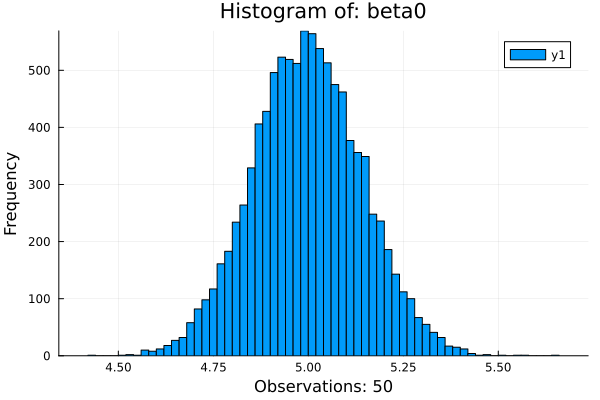

In [4]:
# Exercise 2.10
Ex210(50, 0)

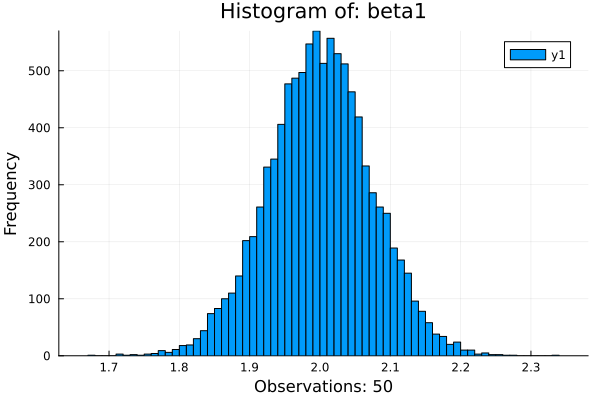

In [5]:
# Exercise 2.10
Ex210(50, 1)

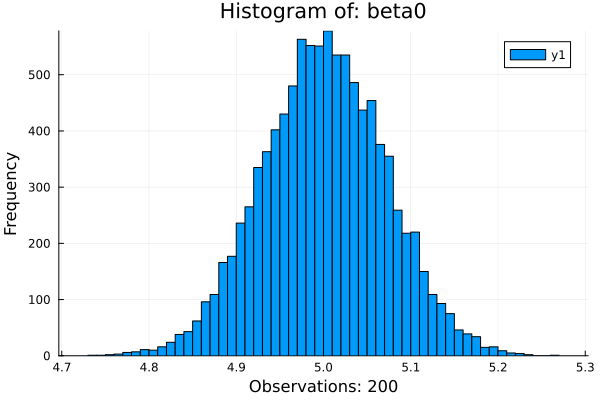

In [6]:
# Exercise 2.10
Ex210(200, 0)

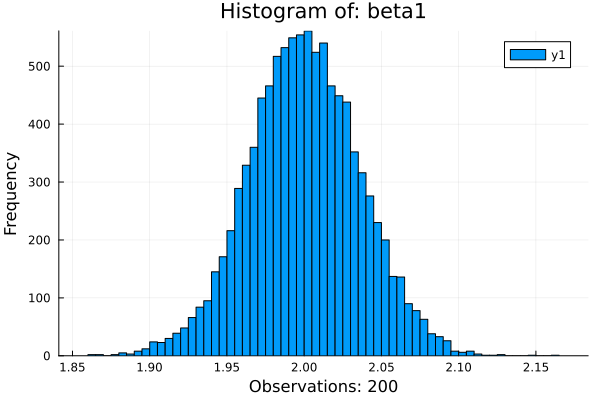

In [7]:
# Exercise 2.10
Ex210(200, 1)

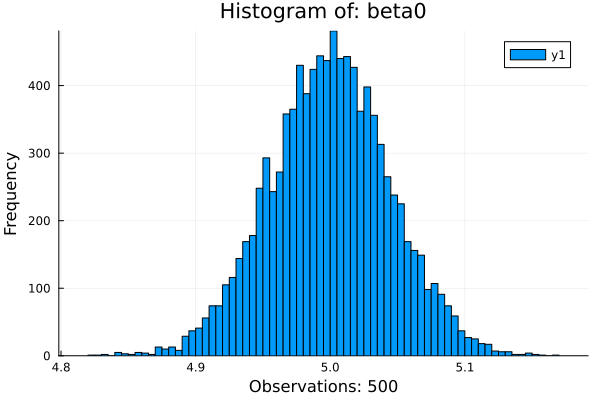

In [8]:
# Exercise 2.10
Ex210(500, 0)

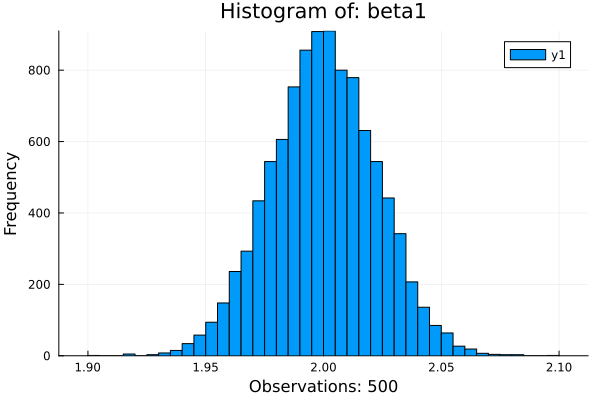

In [9]:
# Exercise 2.10
Ex210(500, 1)

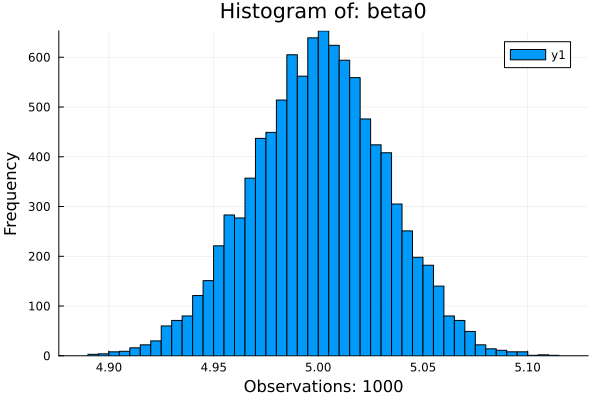

In [10]:
# Exercise 2.10
Ex210(1000, 0)

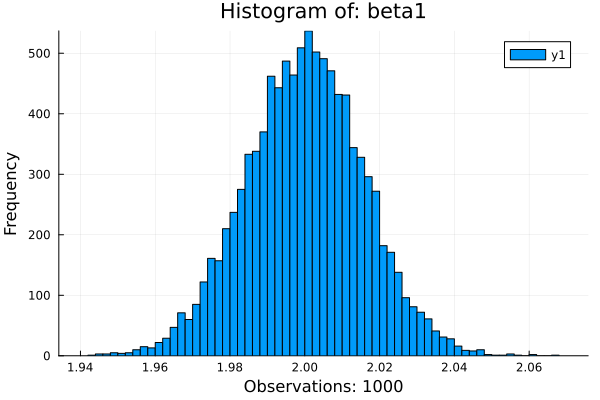

In [11]:
# Exercise 2.10
Ex210(1000, 1)

In [12]:
# Exercise 2.11
Random.seed!(1967)

function Ex211(n, plotB=0)

    beta = zeros(2, 10000)
    
    for i in 1:10000
        
        x = rand(Normal(0, 2), n)
        b = ones(n)
        X = [b x]
        u = [rand(Normal(0, xi^2)) for xi in x]
        Beta = [5; 2]
    
        y = (X * Beta) + u
    
        estimates = regress(y, X)
        beta[:, i] = estimates.beta 
    end
    
    if plotB == 0
        histogram(beta[1, 1:10000], ylabel = "Frequency", xlabel = "Observations: $n", title = "Histogram of: beta0")
    elseif plotB == 1
        histogram(beta[2, 1:10000], ylabel = "Frequency", xlabel = "Observations: $n", title = "Histogram of: beta1")
    else
        println("Error! beta is incorrect")
    end
    end

Ex211 (generic function with 2 methods)

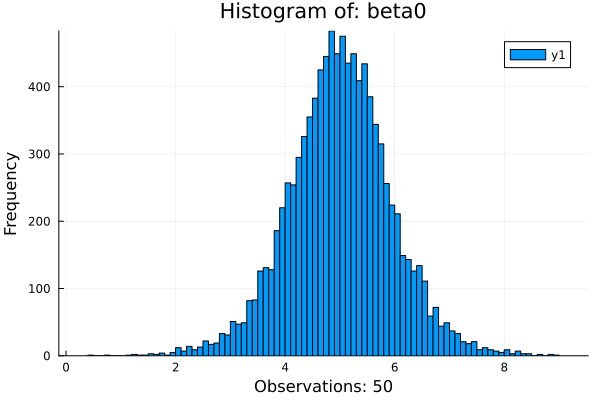

In [13]:
# Exercise 2.11
Ex211(50, 0)

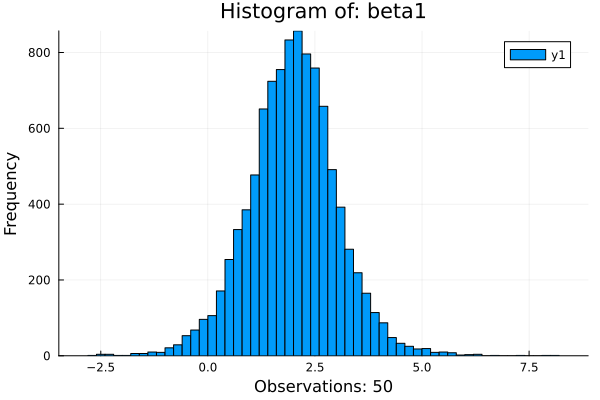

In [14]:
# Exercise 2.11
Ex211(50, 1)

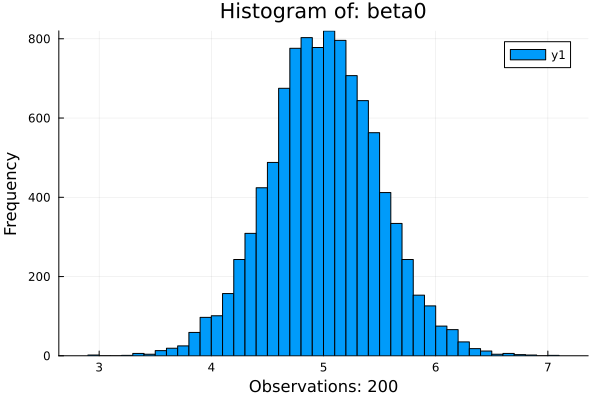

In [15]:
# Exercise 2.11
Ex211(200, 0)

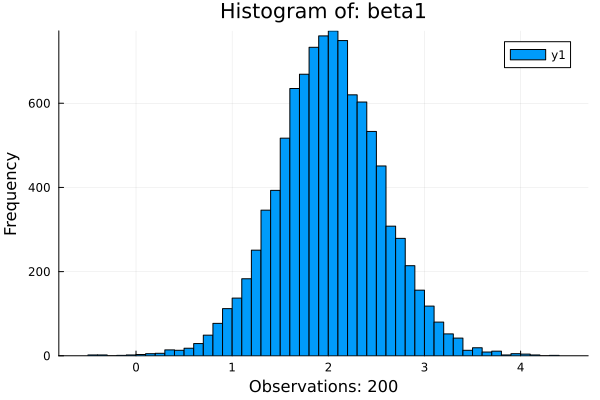

In [16]:
# Exercise 2.11
Ex211(200, 1)

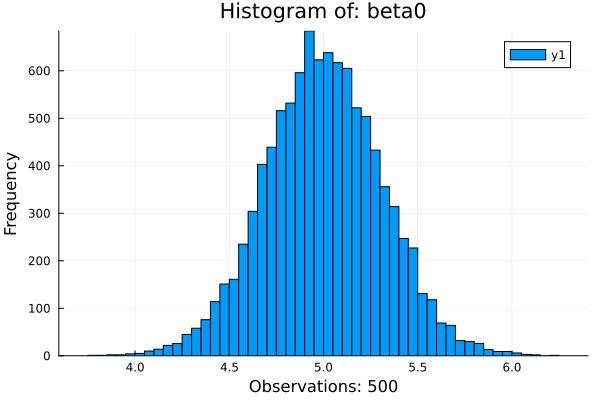

In [17]:
# Exercise 2.11
Ex211(500, 0)

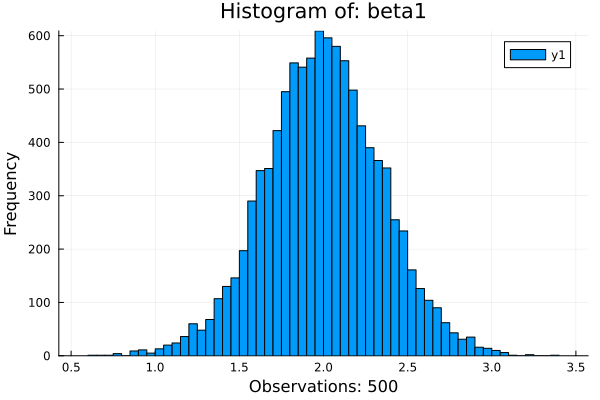

In [18]:
# Exercise 2.11
Ex211(500, 1)

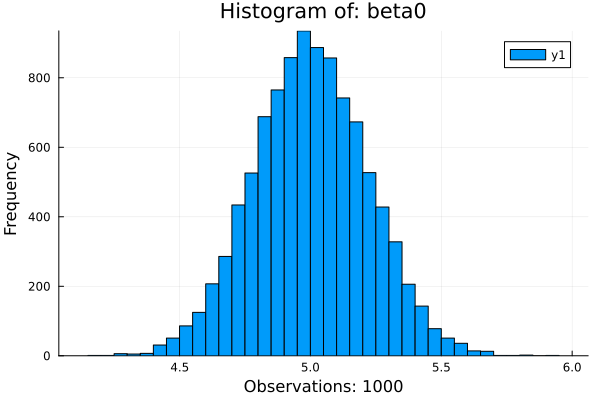

In [19]:
# Exercise 2.11
Ex211(1000, 0)

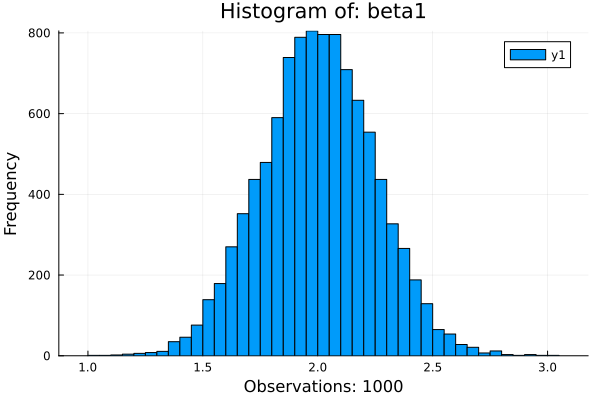

In [20]:
# Exercise 2.11
Ex211(1000, 1)

### Team 4 presents (Team 1 lead/back up/feedback)

In [21]:
# Exercise 2.6

xl = DataFrame(XLSX.readtable("ME-data-2-03.xlsx", "Sheet1"))
data = Float64.(xl)

Row,FLUORIDE,CARIES
,Float64,Float64
1,1.9,236.0
2,2.6,246.0
3,1.8,252.0
4,1.2,258.0
5,1.2,281.0
6,1.2,303.0
7,1.3,323.0
8,0.9,343.0
9,0.6,412.0


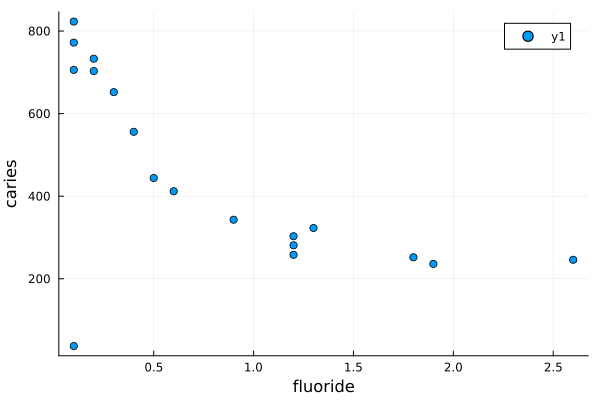

In [22]:
scatter(data[:, 1], data[:, 2], xlabel = "fluoride", ylabel = "caries", )

There is an outlier close to the origin.

The relationship seems to be non-linear thus a linear regression would not be a good fit. This could be a negative exponential.

The linear model would fit better if we remove the outlier or by taking logarithms $\rightarrow log(e^{x}) = x$.



In [23]:
# Exercise 2.6

n = 18;
i = ones(n);
x = data[:, 1];
X = [i x];
y = data[:, 2];

In [24]:
# Exercise 2.6 (Case 3)

println("The RSquared is:", regress(y, X).RSq)
println("The Ajusted is:", regress(y, X).Adj)

The RSquared is:0.4225973756576219
The Ajusted is:0.3865097116362233


In [25]:
# Exercise 2 (Case 3)

x2 = x .* x
X = [i x x2]

println("The RSquared is:", regress(y, X).RSq)
println("The Ajusted is:", regress(y, X).Adj)


The RSquared is:0.4917244051049986
The Ajusted is:0.42395432578566505


In [26]:
# Exercise 2 (Case 3)

O = [zeros(17) ; 1]
X = [i x x2 O]

println("The RSquared is:", regress(y, X).RSq)
println("The Ajusted is:", regress(y, X).Adj)

The RSquared is:0.9619928781305884
The Ajusted is:0.9538484948728574


In [27]:
# Exercise 2 (Case 3)

X = [i x O]

println("The RSquared is:", regress(y, X).RSq)
println("The Ajusted is:", regress(y, X).Adj)

The RSquared is:0.8030832328493308
The Ajusted is:0.7768276638959082


In [28]:
X = [i x x2 O] # The third model should be the best

println(regress(y, X).betaSE)


[24.72689952068675, 53.88511021898661, 22.19055140591962, 54.075829814166276]


### Team 1 presents (Team 2 lead/back up/feedback)

The information criterion (IC) is a measure that balances goodness-of-fit and model complexity.

The information criterion does not have a bound but the best model is the one with the smallest value for the IC.

In [29]:
# Exercise 3 (Case 3)

X = [i x]

AIC = log(regress(y, X).s2) + (2*regress(y, X).K / regress(y, X).n)

10.630089375531663

In [30]:
# Exercise 3 (Case 3)

SC = log(regress(y, X).s2) + (log(regress(y, X).n)*regress(y, X).K / regress(y, X).n)

10.72901957085346

In [31]:
# Exercise 3 (Case 3)

X = [i x x2 ]

AIC = log(regress(y, X).s2) + (2*regress(y, X).K / regress(y, X).n)

10.678223005568164

In [32]:
# Exercise 3 (Case 3)

SC = log(regress(y, X).s2) + (log(regress(y, X).n)*regress(y, X).K / regress(y, X).n)

10.826618298550857

In [33]:
# Exercise 3 (Case 3)

X = [i x x2 O]

AIC = log(regress(y, X).s2) + (2*regress(y, X).K / regress(y, X).n)

8.265076737839058

In [34]:
# Exercise 3 (Case 3)

SC = log(regress(y, X).s2) + (log(regress(y, X).n)*regress(y, X).K / regress(y, X).n)

8.46293712848265

In [35]:
# Exercise 3 (Case 3)

X = [i x O]

AIC = log(regress(y, X).s2) + (2*regress(y, X).K / regress(y, X).n)

9.729980333144717

In [36]:
# Exercise 3 (Case 3)

SC = log(regress(y, X).s2) + (log(regress(y, X).n)*regress(y, X).K / regress(y, X).n)

9.87837562612741